In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-fares-dataset/uber.csv


**Description:** <br>
<br>
The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.<br>
<br>
The datset contains the following fields:<br>
<br>
key - a unique identifier for each trip<br>
fare_amount - the cost of each trip in usd<br>
pickup_datetime - date and time when the meter was engaged<br>
passenger_count - the number of passengers in the vehicle (driver entered value)<br>
pickup_longitude - the longitude where the meter was engaged<br>
pickup_latitude - the latitude where the meter was engaged<br>
dropoff_longitude - the longitude where the meter was disengaged<br>
dropoff_latitude - the latitude where the meter was disengaged <br>
<br>
**Acknowledgement:** <br>
The dataset is referred from Kaggle.
<br>
<br>

**Objective:** <br>
Understand the Dataset & cleanup (if required).<br>
Build Regression models to predict the fare price of uber ride.<br>
Also evaluate the models & compare thier respective scores like R2, RMSE, etc.<br>

**Steps Taken :**<br>
The solution is divided into the following sections:
<br>
- Reading and understanding data
- Inspecting the dataframe
- Exploratory Data Analysis, Feature Engineering & Data Visualization
- Model Selection and Evaluation & Residual Analysis


## Reading and Understanding data

In [2]:
#Importing all the necessary libraries
#Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
from tqdm import tqdm
from IPython.display import display
plt.style.use('ggplot')

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import math

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

In [3]:
fare = pd.read_csv('../input/uber-fares-dataset/uber.csv')

#Dropping 'Unnamed' column
fare.drop(['Unnamed: 0' , 'key'] ,axis = 1,  inplace = True)

fare.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Inspecting the Dataframe

In [4]:
#printing the shape of the data
print('*'*10,'Shape','*'*10)
print(fare.shape)

print()
#checking summary of the data
print('*'*10,'Info','*'*10)
print(fare.info())

********** Shape **********
(200000, 7)

********** Info **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB
None


In [5]:
#checking the statistical summary of the data
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


- It seems that there are no null values, so we will skip the null value analysis.

### Check Unique Values


In [6]:
fare.passenger_count.value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

In [7]:
#Removing entries having passenger_count 0 and 208 becoz it's practically not possible to have zero or 208 passengers at a time
fare = fare[~(fare.passenger_count == 0) & ~(fare.passenger_count == 208)]

In [8]:
# Check if the latitude and longitude values are valid
fare = fare[(fare.pickup_latitude<90) & (fare.dropoff_latitude<90) &
        (fare.pickup_latitude>-90) & (fare.dropoff_latitude>-90) &
        (fare.pickup_longitude<180) & (fare.dropoff_longitude<180) &
        (fare.pickup_longitude>-180) & (fare.dropoff_longitude>-180)]

#Change the date to datetime
fare.pickup_datetime=pd.to_datetime(fare.pickup_datetime)

# Extract values from dates
fare['year'] = fare.pickup_datetime.dt.year
fare['month'] = fare.pickup_datetime.dt.month
fare['weekday'] = fare.pickup_datetime.dt.weekday
fare['hour'] = fare.pickup_datetime.dt.hour

# categorize quarters and hours
fare['Monthly_Quarter'] = fare.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
fare['Hourly_Segments'] = fare.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

# calculate the distance by using longitude and longitude

from geopy.distance import geodesic
fare['Distance']=[round(geodesic((fare.pickup_latitude[i], fare.pickup_longitude[i]),(fare.dropoff_latitude[i], fare.dropoff_longitude[i])).km,2) for i in fare.index]

fare.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

original_fare = fare.copy(deep=True)

fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4.48


In [9]:
# define categorical and numerical col

categorical = ['passenger_count', 'year', 'weekday', 'Monthly_Quarter', 'Hourly_Segments']

numerical = [i for i in fare.columns if i not in categorical]

## Exploratory Data Analysis, Feature Engineering & Data Visualization

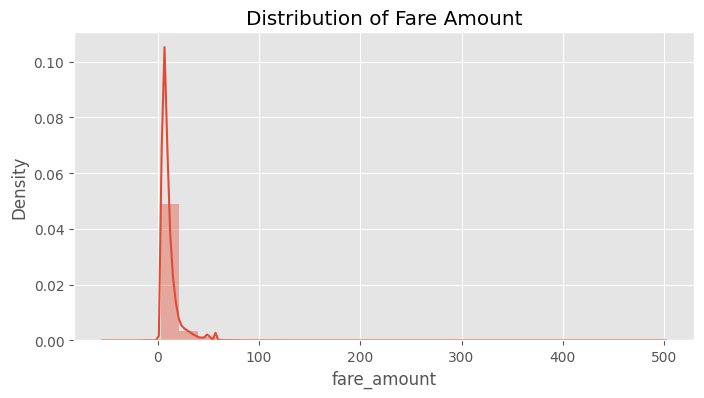

In [10]:
#Check the distribution of Target variable- fareamount

plt.figure(figsize = [8,4])
sns.distplot(fare['fare_amount'] , bins = 30)
plt.title('Distribution of Fare Amount')
plt.show()

- It seems that target variable is highly skewed

In [11]:
#check the outliers
fare[fare.fare_amount > 150]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,Distance
4292,350.00,0.000000,0.000000,0.000000,0.000000,3,2014,4,Q4,H6,0.00
18415,190.00,-73.797236,40.665420,-73.101445,40.812208,1,2012,6,Q3,H3,60.99
19509,180.00,-73.567558,41.047142,-73.567596,41.047127,1,2015,6,Q2,H5,0.00
23682,206.38,-73.782161,40.644601,-74.449079,40.836457,1,2014,6,Q4,H6,60.22
29261,220.00,-73.801147,40.671653,-73.790402,40.646742,1,2013,4,Q3,H4,2.91
33911,192.33,-73.542097,41.052430,-73.542097,41.052430,2,2014,2,Q1,H5,0.00
39716,191.80,-73.822978,40.788500,-73.548110,41.045037,1,2012,1,Q2,H6,36.71
45094,170.00,-73.789297,40.643437,-74.402822,40.698832,1,2014,0,Q4,H5,52.24
53996,171.35,-74.291586,40.768783,-74.291589,40.768786,1,2014,2,Q1,H1,0.00
71715,250.00,0.000000,0.000000,0.000000,0.000000,1,2013,5,Q2,H1,0.00


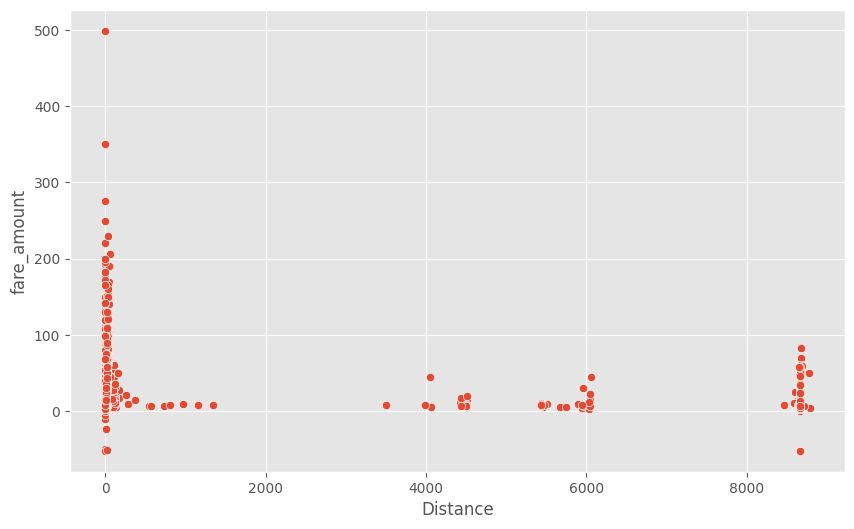

In [12]:
sns.scatterplot(data=fare, x="Distance", y="fare_amount")
plt.show()


In [13]:
#filtering out the outliers to reduce skewness
fare = fare[(fare.fare_amount < 250) & (fare.fare_amount > 0)]

In [14]:
#Check the distribution again
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
count,199252.000000,199252.000000,199252.000000,199252.000000,199252.000000,199252.000000,199252.000000,199252.000000,199252.00000
mean,11.362708,-72.505257,39.919769,-72.515492,39.924081,1.689444,2011.743691,3.049335,20.32437
std,9.784016,10.438556,6.125860,10.399342,6.112405,1.305393,1.859082,1.946787,376.89501
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,0.000000,0.00000
25%,6.000000,-73.992063,40.734796,-73.991409,40.733829,1.000000,2010.000000,1.000000,1.22000
50%,8.500000,-73.981825,40.752583,-73.980095,40.753042,1.000000,2012.000000,3.000000,2.12000
75%,12.500000,-73.967164,40.767155,-73.963664,40.767995,2.000000,2013.000000,5.000000,3.88000
max,230.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,6.000000,8783.59000


In [15]:
# we can see that distance is highly skewed
fare.Distance

0          1.68
1          2.45
2          5.04
3          1.66
4          4.48
          ...  
199995     0.11
199996     1.88
199997    12.87
199998     3.54
199999     5.41
Name: Distance, Length: 199252, dtype: float64

<Axes: xlabel='Distance', ylabel='Density'>

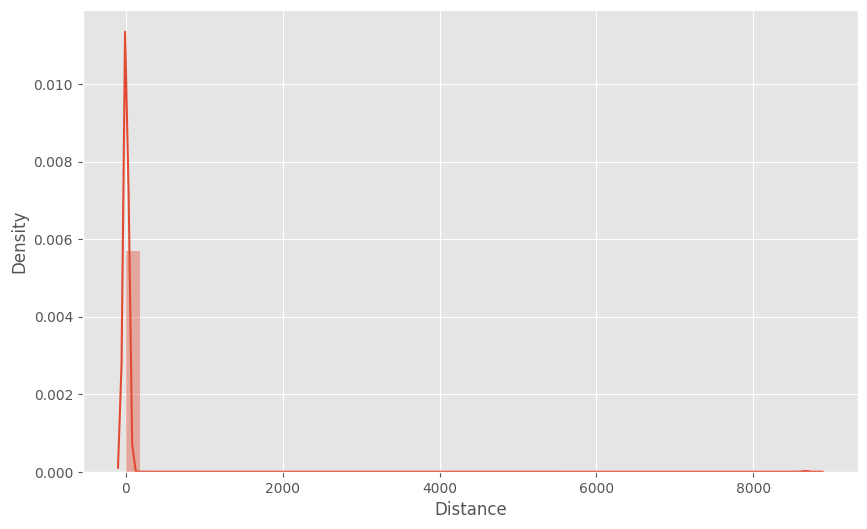

In [16]:
#Check the distribution of distance
sns.distplot(fare['Distance'])

- Here you can observe that distance is highly skewed. Digging more dipper into it we found out that for larger distances fare is still smaller, which shouldn't be the case.In this case, farfe should if higher as distance is larger. we will simply drop the larger distance

In [17]:
fare = fare[fare.Distance < 1000]

In [18]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
count,198837.000000,198837.000000,198837.000000,198837.000000,198837.000000,198837.000000,198837.000000,198837.000000,198837.000000
mean,11.355183,-72.583255,39.958184,-72.582346,39.958405,1.689464,2011.741547,3.049784,3.310382
std,9.768605,10.169652,6.002690,10.169532,6.002790,1.305310,1.859049,1.946753,5.597508
min,0.010000,-77.316665,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992075,40.734875,-73.991418,40.733905,1.000000,2010.000000,1.000000,1.210000
50%,8.500000,-73.981842,40.752620,-73.980118,40.753070,1.000000,2012.000000,3.000000,2.120000
75%,12.500000,-73.967242,40.767177,-73.963760,40.768017,2.000000,2013.000000,5.000000,3.860000
max,230.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,6.000000,971.410000


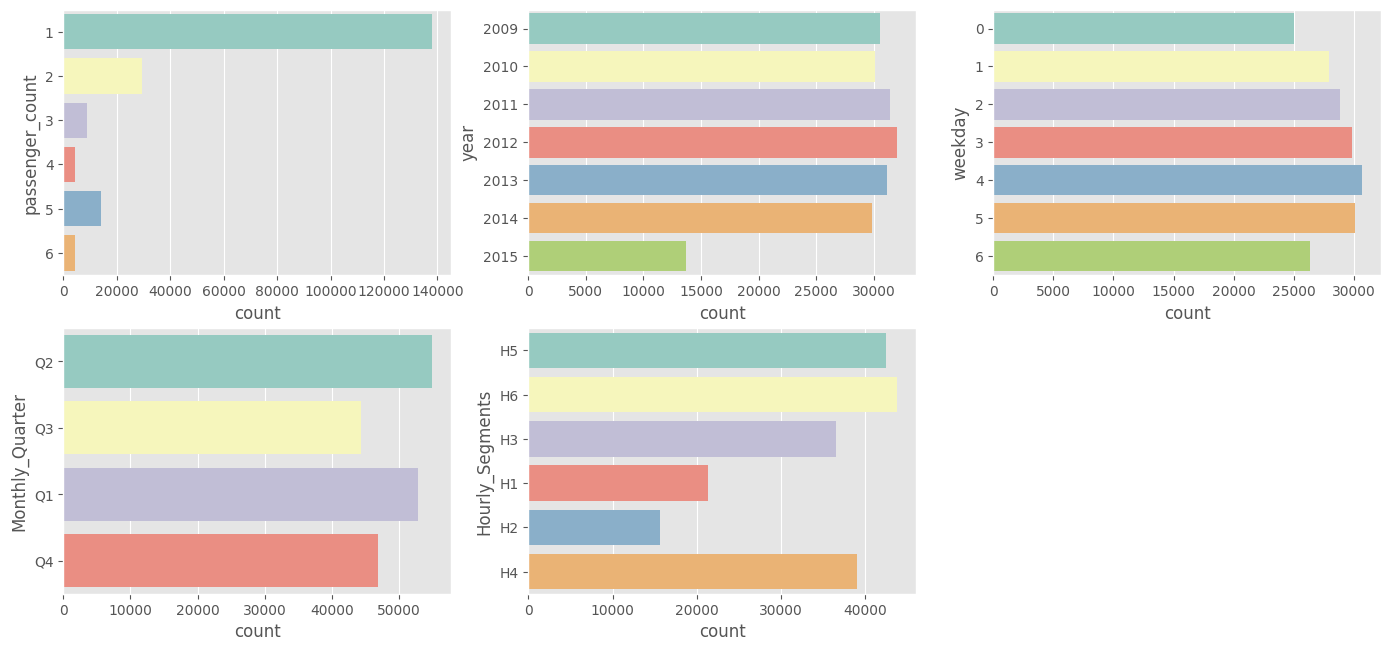

In [19]:
#visulaising the categorical features
plt.figure(figsize=(17, 20))

plt.subplot(5,3,1)
sns.countplot(y = 'passenger_count' , palette = 'Set3' , data = fare)

plt.subplot(5,3,2)
sns.countplot(y = 'year', palette='Set3', data = fare)

plt.subplot(5,3,3)
sns.countplot(y = 'weekday', palette='Set3', data = fare)

plt.subplot(5,3,4)
sns.countplot(y = 'Monthly_Quarter', palette='Set3', data = fare)

plt.subplot(5,3,5)
sns.countplot(y = 'Hourly_Segments', palette='Set3', data = fare)

plt.show()

### Data preprocessing

In [20]:
fare.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int32
weekday                int32
Monthly_Quarter       object
Hourly_Segments       object
Distance             float64
dtype: object

In [21]:
# Converting data types of necessary columns
fare[['year','weekday', 'passenger_count']] = fare[['year','weekday', 'passenger_count']].astype(str)

In [22]:
# creating dummy variables for categorical variables

# subset all categorical variables
categorical_col = fare.select_dtypes( include=['object'] )
categorical_col.head() 

,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments
0,1,2015,3,Q2,H5
1,1,2009,4,Q3,H6
2,1,2009,0,Q3,H6
3,3,2009,4,Q2,H3
4,5,2014,3,Q3,H5


In [23]:
# convert into dummies
fare_dummies = pd.get_dummies(categorical_col, drop_first=True)
fare_dummies.head()


,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2010,year_2011,year_2012,year_2013,year_2014,...,weekday_5,weekday_6,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,Hourly_Segments_H4,Hourly_Segments_H5,Hourly_Segments_H6
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [24]:
# drop categorical variables 
fare = fare.drop(list(categorical_col.columns), axis=1)

# concat dummy variables with X
fare_new = pd.concat([fare, fare_dummies], axis=1)

# storing column names in cols, so we can keep track of column name
cols = fare_new.columns

In [25]:
#removal of outliers, which may affect stability of the model
fare1 = fare_new.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = ['Distance' , 'fare_amount']

for i in features1:
    Q1 = fare1[i].quantile(0.25)
    Q3 = fare1[i].quantile(0.75)
    IQR = Q3 - Q1
    fare1 = fare1[fare1[i] <= (Q3+(1.5*IQR))]
    fare1 = fare1[fare1[i] >= (Q1-(1.5*IQR))]
    fare1 = fare1.reset_index(drop=True)
display(fare1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(fare_new.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(fare1.shape[0]))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,...,weekday_5,weekday_6,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,Hourly_Segments_H4,Hourly_Segments_H5,Hourly_Segments_H6
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.68,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2.45,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,12.9,-74.005043,40.740770,-73.962565,40.772647,5.04,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1.66,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
4,16.0,-73.925023,40.744085,-73.973082,40.761247,4.48,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False



Inference:
Before removal of outliers, The dataset had 198837 samples.
After removal of outliers, The dataset now has 176075 samples.


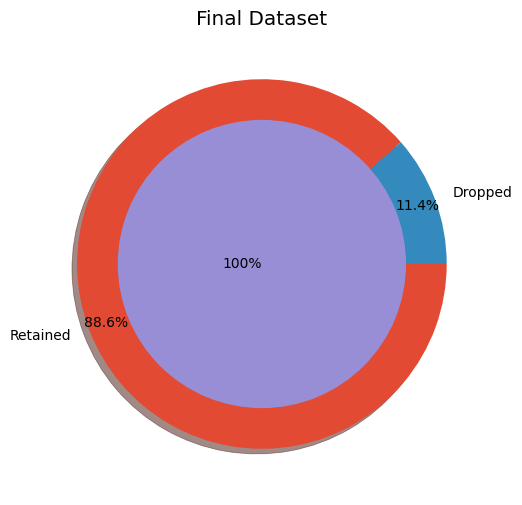


Inference: After the cleanup process, 22762 samples were dropped, while retaining 11.45% of the data.


In [26]:
#Final Dataset size after performing Preprocessing

df = fare1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], fare.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {fare.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(fare.shape[0])),2)}% of the data.')

In [27]:
# split into train and test
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop(['fare_amount'],axis=1)
Y = df['fare_amount']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (176075, 30) (176075,) 
Training set  --->  (140860, 30) (140860,) 
Testing set   --->  (35215, 30)  (35215,)


In [28]:
#Scaling the variables of train set
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,...,weekday_5,weekday_6,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,Hourly_Segments_H4,Hourly_Segments_H5,Hourly_Segments_H6
count,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,...,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05,1.408600e+05
mean,-1.246893e-15,-8.953666e-19,2.080479e-15,8.233085e-16,-3.467465e-16,-1.346833e-17,3.730274e-17,-2.370830e-17,-1.634359e-17,3.924480e-17,...,-3.561289e-17,3.631909e-18,2.749154e-17,-2.501982e-17,8.436623e-17,2.935793e-17,6.161005e-17,-9.687614e-17,-4.804714e-17,3.934569e-18
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.754302e-01,-1.914893e+01,-2.743410e-01,-1.914987e+01,-1.453455e+00,-4.141610e-01,-2.167728e-01,-1.472151e-01,-2.748569e-01,-1.475419e-01,...,-4.245306e-01,-3.862062e-01,-6.158324e-01,-5.348823e-01,-5.523414e-01,-2.830026e-01,-4.783659e-01,-4.951366e-01,-5.256304e-01,-5.341139e-01
25%,-1.374754e-01,1.290034e-01,-1.375602e-01,1.289242e-01,-7.344855e-01,-4.141610e-01,-2.167728e-01,-1.472151e-01,-2.748569e-01,-1.475419e-01,...,-4.245306e-01,-3.862062e-01,-6.158324e-01,-5.348823e-01,-5.523414e-01,-2.830026e-01,-4.783659e-01,-4.951366e-01,-5.256304e-01,-5.341139e-01
50%,-1.364841e-01,1.317520e-01,-1.365068e-01,1.318297e-01,-2.551724e-01,-4.141610e-01,-2.167728e-01,-1.472151e-01,-2.748569e-01,-1.475419e-01,...,-4.245306e-01,-3.862062e-01,-6.158324e-01,-5.348823e-01,-5.523414e-01,-2.830026e-01,-4.783659e-01,-4.951366e-01,-5.256304e-01,-5.341139e-01
75%,-1.352113e-01,1.340639e-01,-1.351690e-01,1.341511e-01,5.079444e-01,-4.141610e-01,-2.167728e-01,-1.472151e-01,-2.748569e-01,-1.475419e-01,...,-4.245306e-01,-3.862062e-01,1.623818e+00,-5.348823e-01,-5.523414e-01,-2.830026e-01,-4.783659e-01,-4.951366e-01,-5.256304e-01,-5.341139e-01
max,1.121113e+01,8.506405e-01,1.121318e+01,8.505996e-01,3.484731e+00,2.414520e+00,4.613125e+00,6.792783e+00,3.638257e+00,6.777735e+00,...,2.355543e+00,2.589290e+00,1.623818e+00,1.869570e+00,1.810475e+00,3.533536e+00,2.090450e+00,2.019645e+00,1.902478e+00,1.872260e+00



                                Standardardization on Testing set                                


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,...,weekday_5,weekday_6,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,Hourly_Segments_H4,Hourly_Segments_H5,Hourly_Segments_H6
count,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,...,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000,35215.000000
mean,0.008749,-0.007806,0.008749,-0.007788,-0.007190,-0.003133,-0.004595,0.008080,0.005056,-0.004966,...,0.000750,0.005513,0.001526,-0.003670,0.002818,0.004416,0.006365,-0.008534,0.004534,-0.006919
std,1.029068,1.018516,1.029072,1.018517,0.994214,0.996871,0.989852,1.026480,1.008468,0.983402,...,1.000738,1.006054,1.000782,0.997555,1.001781,1.007157,1.005111,0.993451,1.003120,0.995350
min,-0.206434,-19.148505,-0.206576,-19.147888,-1.453455,-0.414161,-0.216773,-0.147215,-0.274857,-0.147542,...,-0.424531,-0.386206,-0.615832,-0.534882,-0.552341,-0.283003,-0.478366,-0.495137,-0.525630,-0.534114
25%,-0.137495,0.128879,-0.137557,0.128875,-0.734485,-0.414161,-0.216773,-0.147215,-0.274857,-0.147542,...,-0.424531,-0.386206,-0.615832,-0.534882,-0.552341,-0.283003,-0.478366,-0.495137,-0.525630,-0.534114
50%,-0.136492,0.131718,-0.136505,0.131826,-0.255172,-0.414161,-0.216773,-0.147215,-0.274857,-0.147542,...,-0.424531,-0.386206,-0.615832,-0.534882,-0.552341,-0.283003,-0.478366,-0.495137,-0.525630,-0.534114
75%,-0.135194,0.134045,-0.135178,0.134128,0.489024,-0.414161,-0.216773,-0.147215,-0.274857,-0.147542,...,-0.424531,-0.386206,1.623818,-0.534882,-0.552341,-0.283003,-0.478366,-0.495137,-0.525630,-0.534114
max,11.210205,0.234815,11.213527,0.234786,3.478424,2.414520,4.613125,6.792783,3.638257,6.777735,...,2.355543,2.589290,1.623818,1.869570,1.810475,3.533536,2.090450,2.019645,1.902478,1.872260


### Feature Selection

                                       Correlation Matrix                                       


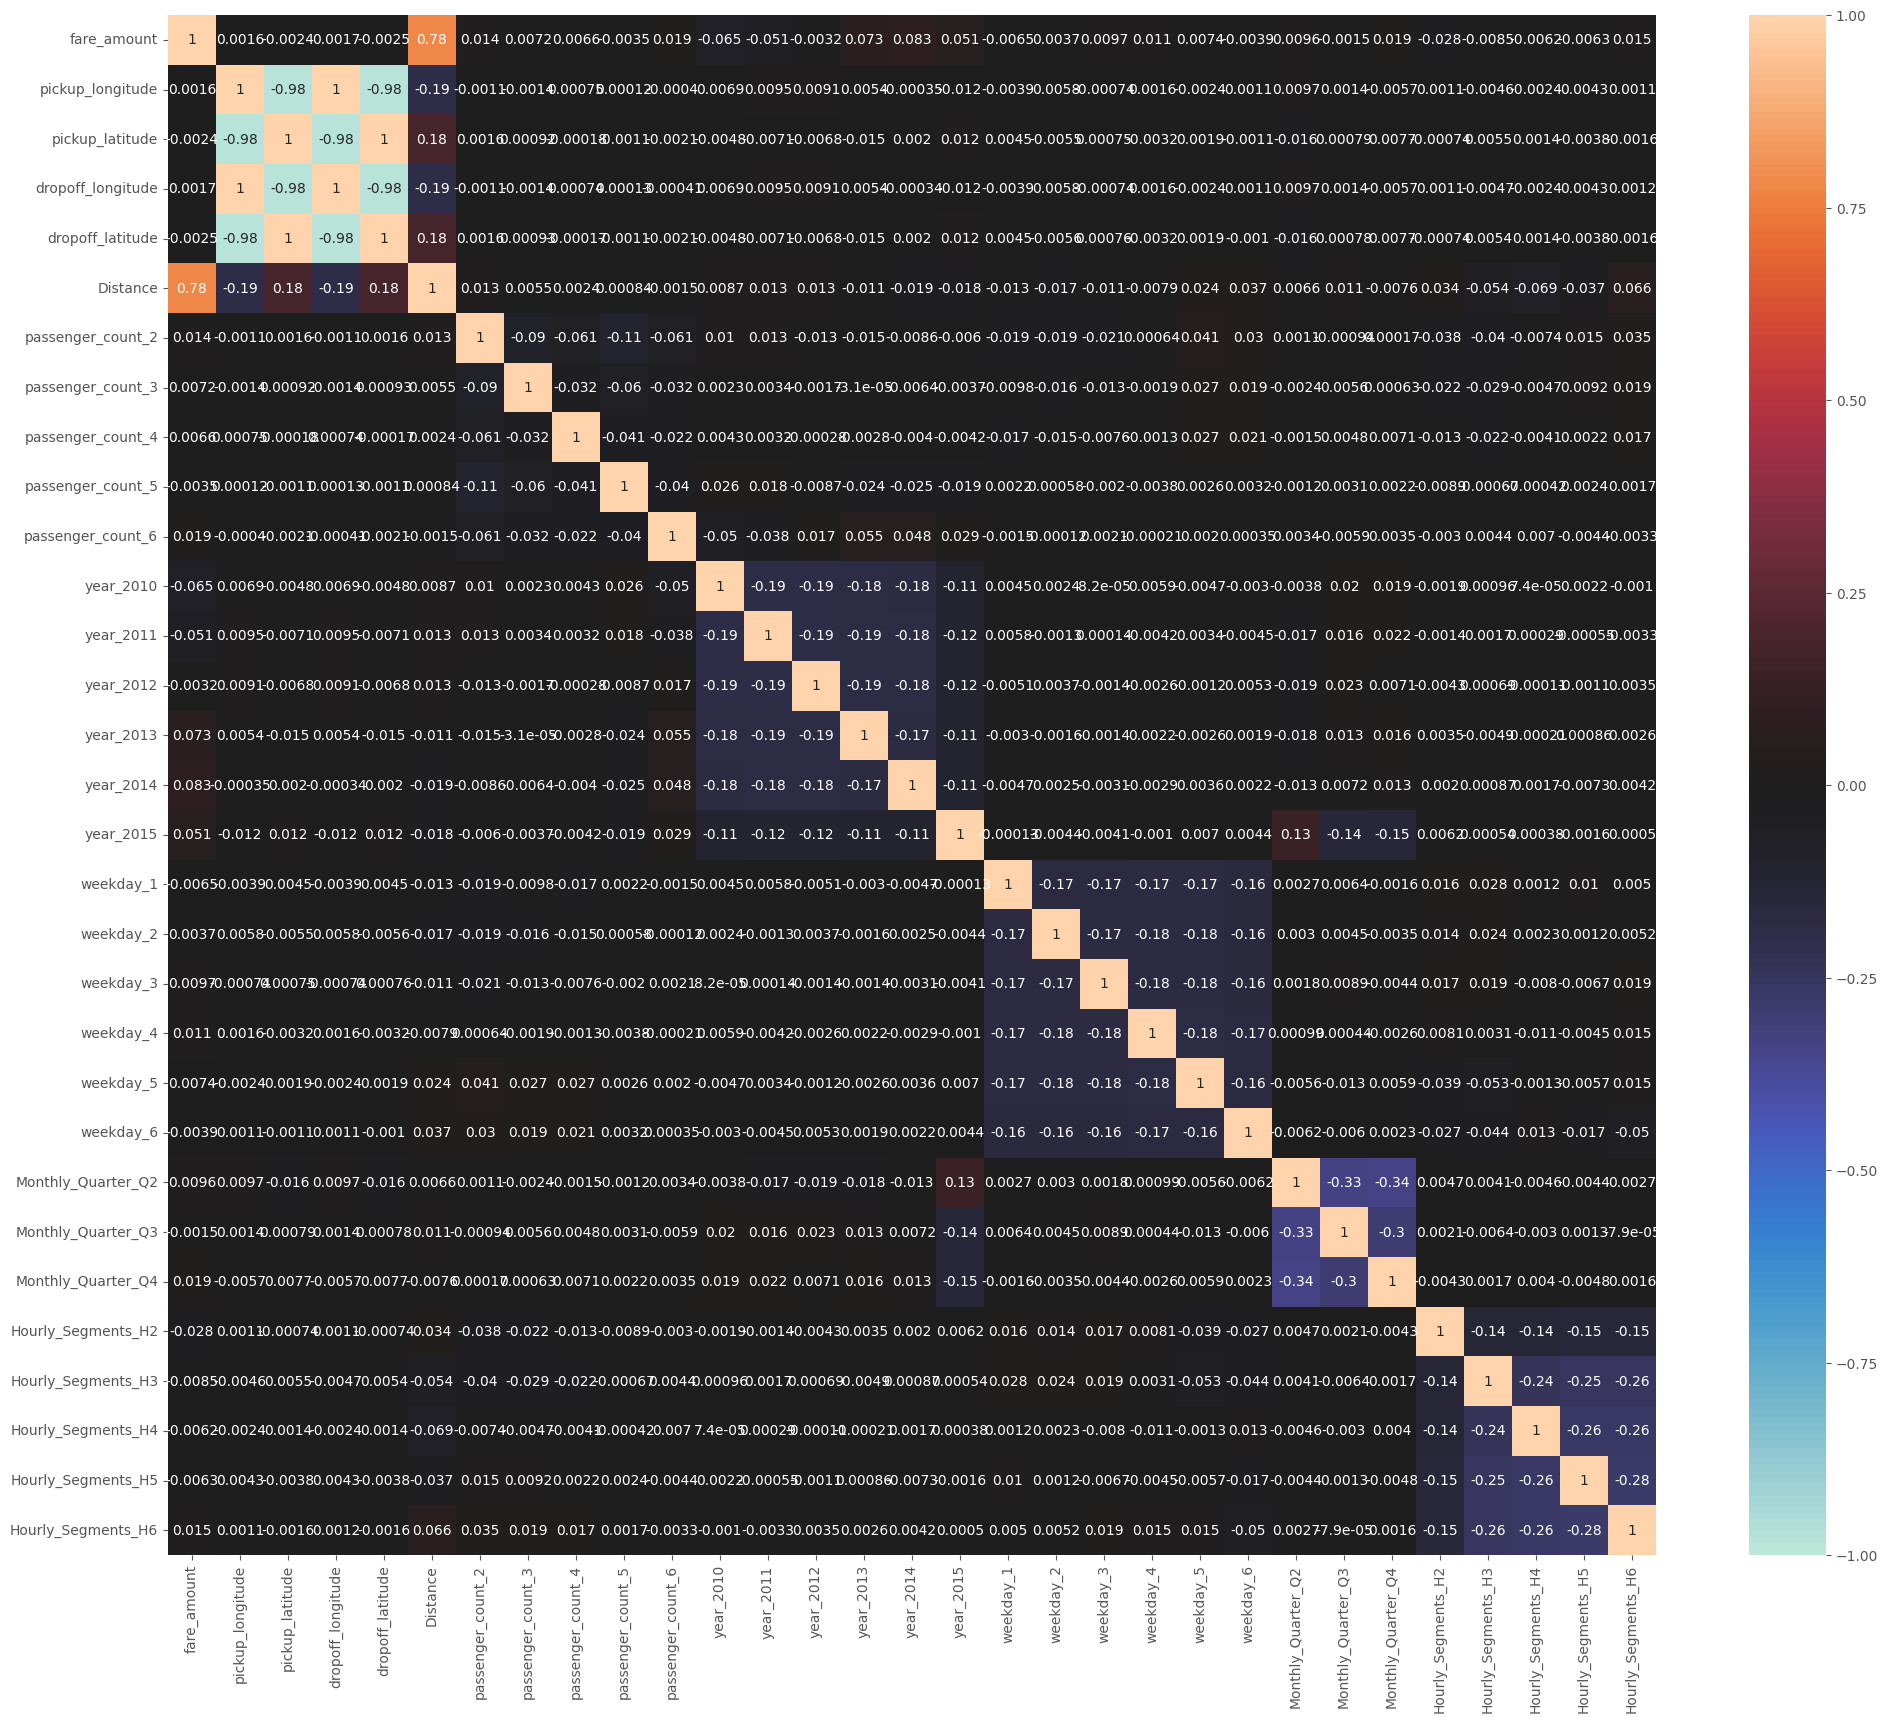

In [29]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[24,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

- It seems that we have high multi correlation present in the data.


In [30]:
target = 'fare_amount'

In [31]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:12:24   Log-Likelihood:            -3.0383e+05
No. Observations:              140860   AIC:                         6.077e+05
Df Residuals:                  140829   BIC:                         6.080e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.1943      0.051    142.025      0.000       7.095       7.294
passenger_count_2[T.True]      0.1459      0.016      9.058      0.000       0.114       0.177
passenger_count_3[T.True]      0.1600      0.027      5.882      0.000       0.107       0.213
passenger_count_4[T.True]      0.2486      0.039      6.386      0.000       0.172       0.325
passenger_count_5[T.True]      0.1009      0.022      4.562      0.000       0.058       0.144
passenger_count_6[T.True]      0.0675      0.039      1.732      0.083      -0.009       0.144
year_2010[T.True]             -0.0398      0.020     -1.993      0.046      -0.079      -0.001
year_2011[T.True]              0.0730      0.020      3.700      0.000       0.034       0.112
year_2012[T.True]              0.4827      0.020     24.431      0.000       0.444       0.521
year_2013[T.True]              1.3471      0.020     67.033      0.000       1.308       1.386
year_2014[T.True]              1.5109      0.020     74.327      0.000       1.471       1.551
year_2015[T.True]              1.6934      0.026     64.023      0.000       1.642       1.745
weekday_1[T.True]              0.2299      0.022     10.651      0.000       0.188       0.272
weekday_2[T.True]              0.3357      0.021     15.630      0.000       0.294       0.378
weekday_3[T.True]              0.3771      0.021     17.686      0.000       0.335       0.419
weekday_4[T.True]              0.3479      0.021     16.432      0.000       0.306       0.389
weekday_5[T.True]              0.0944      0.021      4.414      0.000       0.052       0.136
weekday_6[T.True]             -0.1376      0.022     -6.169      0.000      -0.181      -0.094
Monthly_Quarter_Q2[T.True]     0.1525      0.015     10.080      0.000       0.123       0.182
Monthly_Quarter_Q3[T.True]     0.1900      0.016     11.702      0.000       0.158       0.222
Monthly_Quarter_Q4[T.True]     0.4556      0.016     28.430      0.000       0.424       0.487
Hourly_Segments_H2[T.True]    -0.3176      0.027    -11.667      0.000      -0.371      -0.264
Hourly_Segments_H3[T.True]     0.7014      0.022     31.581      0.000       0.658       0.745
Hourly_Segments_H4[T.True]     0.8329      0.022     38.205      0.000       0.790       0.876
Hourly_Segments_H5[T.True]     0.6041      0.021     28.140      0.000       0.562       0.646
Hourly_Segments_H6[T.True]     0.1210      0.021      5.684      0.000       0.079       0.163
pickup_longitude              -2.1686      0.358     -6.058      0.000      -2.870      -1.467
pickup_latitude                8.2260      0.308     26.677      0.000       7.622       8.830
dropoff_longitude              2.2995      0.358      6.424      0.000       1.598       3.001
dropoff_latitude              -8.1018      

We can fix these multicollinearity with two techniques:

- Manual Method - Variance Inflation Factor (VIF)
- Automatic Method - Recursive Feature Elimination (RFE)
- Feature Elmination using PCA Decomposition

#### a. Manual Method - VIF

100%|██████████| 29/29 [03:31<00:00,  7.30s/it]


Dropped Features -->  ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'Hourly_Segments_H6', 'weekday_5', 'year_2011', 'Monthly_Quarter_Q4', 'Hourly_Segments_H5', 'weekday_4', 'year_2012', 'weekday_3', 'Monthly_Quarter_Q3', 'year_2014', 'Hourly_Segments_H3']


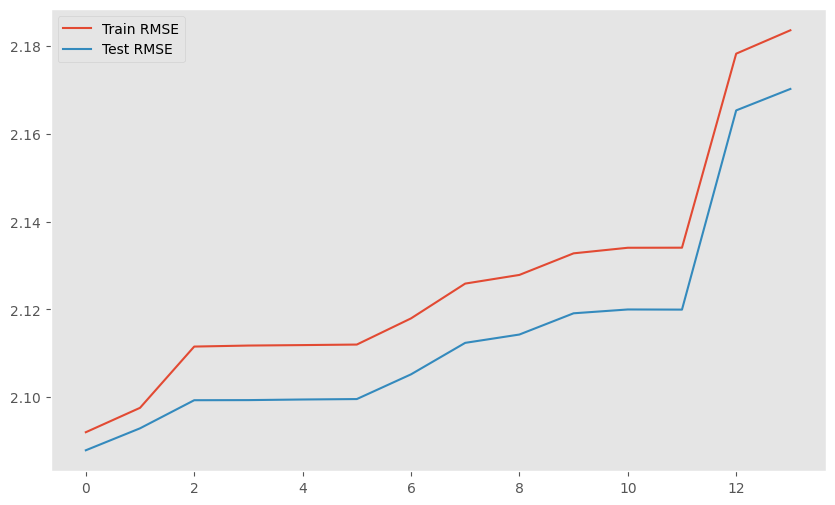

In [32]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in tqdm(range(len(Train_X_std.columns)-1)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

#### b. Automatic Method - RFE

100%|██████████| 29/29 [01:18<00:00,  2.70s/it]


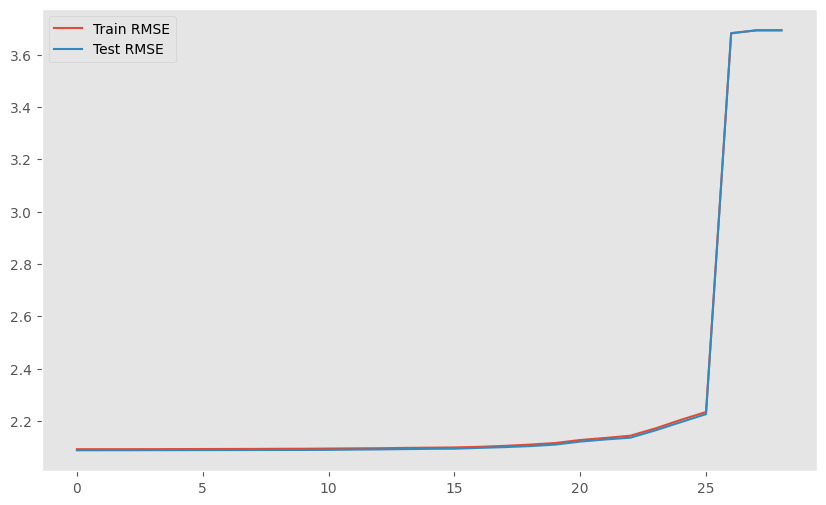

In [33]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in tqdm(range(m)):
    lm = LinearRegression()
    #lm.fit(Train_X_std, Train_Y)

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)
    
    #print(Train_X_std.shape[1]-i)

    #Train_xy = pd.concat([Train_X_std[Train_X.columns[rfe.support_]],Train_Y.reset_index(drop=True)],axis=1)
    #a = Train_xy.columns.values.tolist()
    #a.remove(target)

     #API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in a)), data=Train_xy).fit()
    #DROP.append(vif.loc[0][0])
    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)
    
    #print(Train_X_std.loc[:,rfe.support_].columns)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))
        
# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

#### c. Feature Elmination using PCA Decomposition

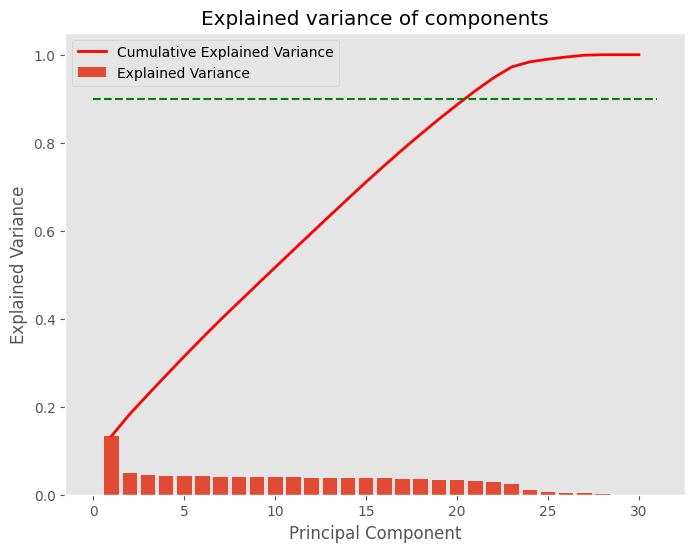

In [34]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

100%|██████████| 27/27 [00:34<00:00,  1.27s/it]


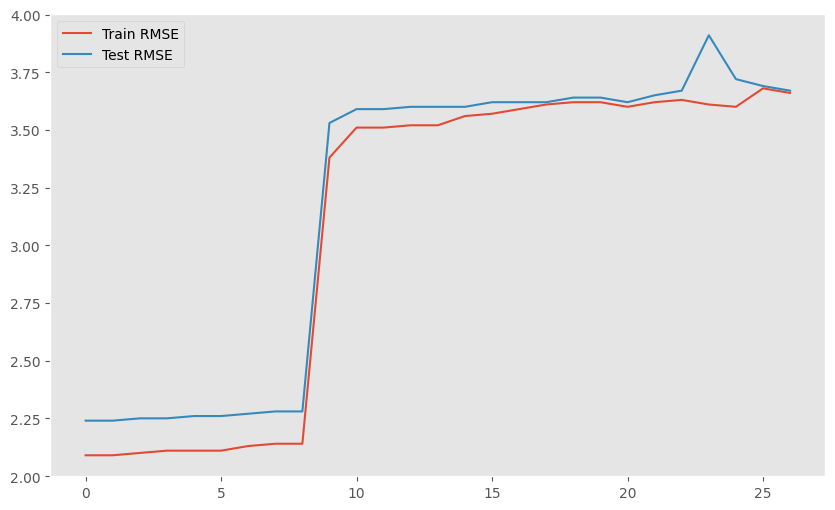

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-4

for i in tqdm(range(m)):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

In [36]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=df.shape[1]-23)           
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

2.1433808573262305
2.1358101620830734


In [37]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>50].columns,3)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model
    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])
    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()


Objective: Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

### 1. Multiple Linear Regression(MLR)

<<<------------------------- Evaluating Multiple Linear Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ -4.18539976  46.82309892   5.4917897  -46.09246683   3.03247489
   0.43140625   0.47967835   0.35372205]
The Intercept of the Regresion Model was found to be  8.608071205452244


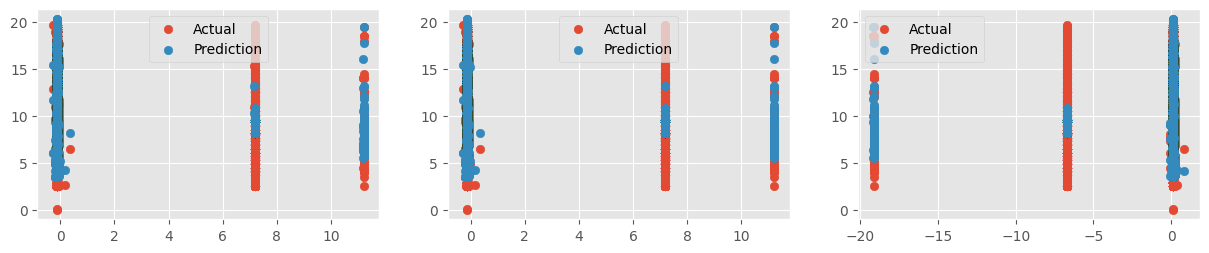



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6651597671109519
Residual Sum of Squares (RSS) on Training set  ---> 647122.320026969
Mean Squared Error (MSE) on Training set       ---> 4.594081499552527
Root Mean Squared Error (RMSE) on Training set ---> 2.1433808573262305

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6677226804262262
Residual Sum of Squares (RSS) on Training set  ---> 160639.73898142466
Mean Squared Error (MSE) on Training set       ---> 4.561685048457324
Root Mean Squared Error (RMSE) on Training set ---> 2.1358101620830734

--------------------Residual Plots--------------------


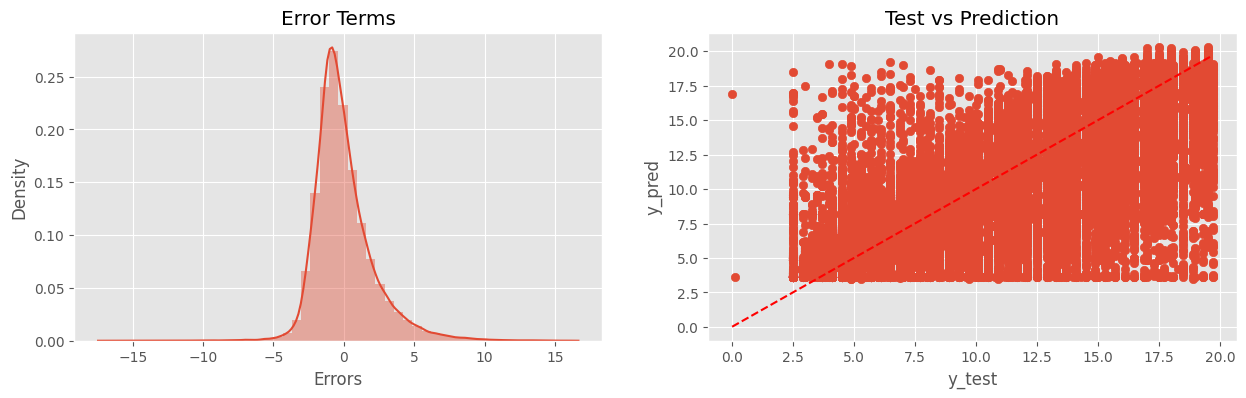

In [38]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

### 2. Ridge Regression Model

<<<------------------------- Evaluating Ridge Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ -4.18539976  46.82309892   5.4917897  -46.09246683   3.03247489
   0.43140625   0.47967835   0.35372205]
The Intercept of the Regresion Model was found to be  8.608071205452244


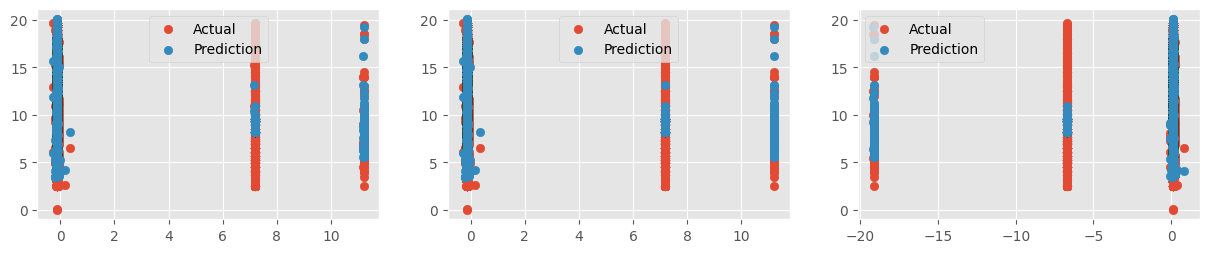



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6646430267467045
Residual Sum of Squares (RSS) on Training set  ---> 648120.988019994
Mean Squared Error (MSE) on Training set       ---> 4.6011712907851345
Root Mean Squared Error (RMSE) on Training set ---> 2.145034100145062

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6673253686535909
Residual Sum of Squares (RSS) on Training set  ---> 160831.81967935566
Mean Squared Error (MSE) on Training set       ---> 4.567139562100118
Root Mean Squared Error (RMSE) on Training set ---> 2.13708669971532

--------------------Residual Plots--------------------


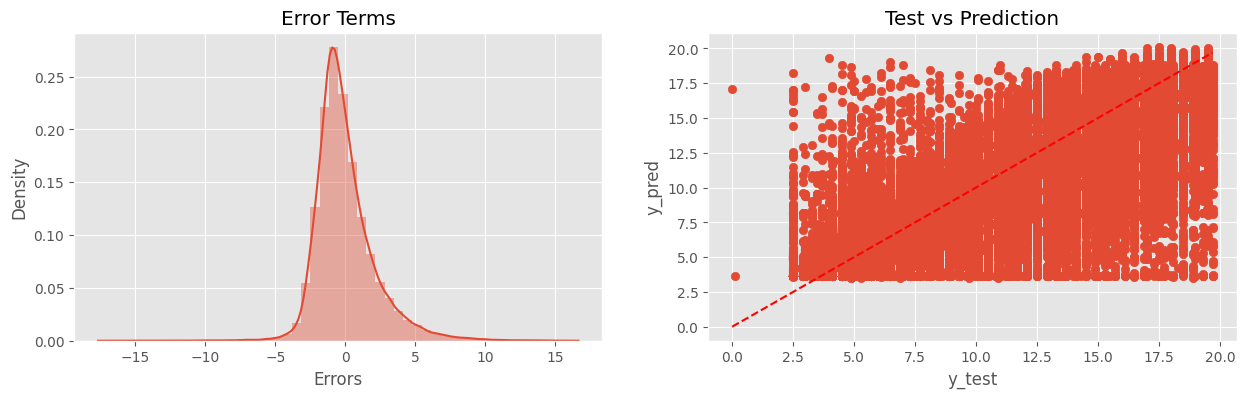

In [39]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

### 3. Lasso Regression Model

<<<------------------------- Evaluating Lasso Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ -4.18539976  46.82309892   5.4917897  -46.09246683   3.03247489
   0.43140625   0.47967835   0.35372205]
The Intercept of the Regresion Model was found to be  8.608071205452244


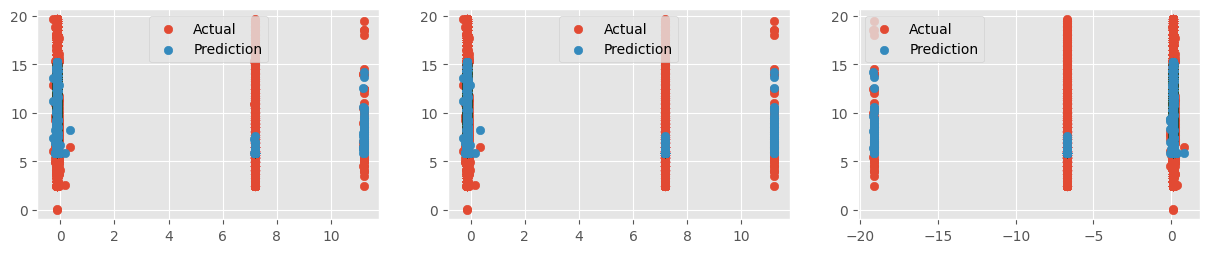



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.5369289180773478
Residual Sum of Squares (RSS) on Training set  ---> 894945.1213960933
Mean Squared Error (MSE) on Training set       ---> 6.3534368976011155
Root Mean Squared Error (RMSE) on Training set ---> 2.5206024870258927

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.536037123950402
Residual Sum of Squares (RSS) on Training set  ---> 224303.22780165193
Mean Squared Error (MSE) on Training set       ---> 6.369536498698052
Root Mean Squared Error (RMSE) on Training set ---> 2.523794068203278

--------------------Residual Plots--------------------


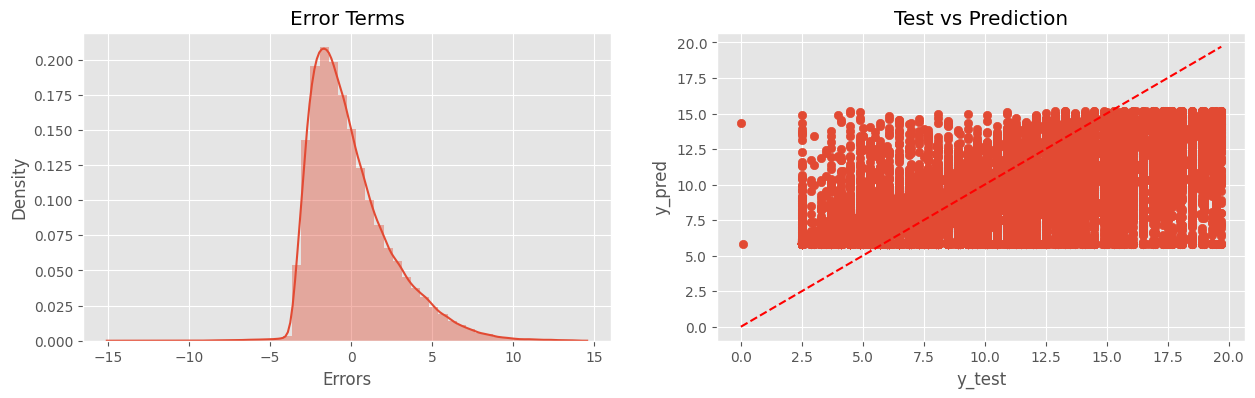

In [40]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

### 4. Elastic-Net Regression

<<<------------------------- Evaluating Elastic-Net Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ -4.18539976  46.82309892   5.4917897  -46.09246683   3.03247489
   0.43140625   0.47967835   0.35372205]
The Intercept of the Regresion Model was found to be  8.608071205452244


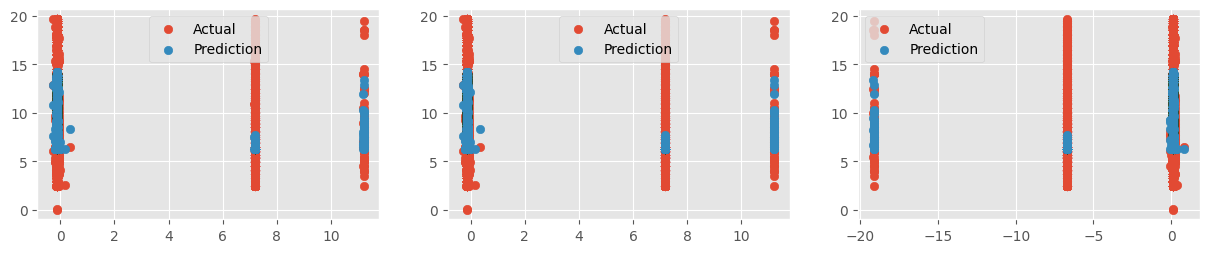



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.48710900832661735
Residual Sum of Squares (RSS) on Training set  ---> 991228.5796390274
Mean Squared Error (MSE) on Training set       ---> 7.036976995875531
Root Mean Squared Error (RMSE) on Training set ---> 2.652730102342779

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.4859354546506172
Residual Sum of Squares (RSS) on Training set  ---> 248524.92036006972
Mean Squared Error (MSE) on Training set       ---> 7.0573596581022215
Root Mean Squared Error (RMSE) on Training set ---> 2.6565691517636467

--------------------Residual Plots--------------------


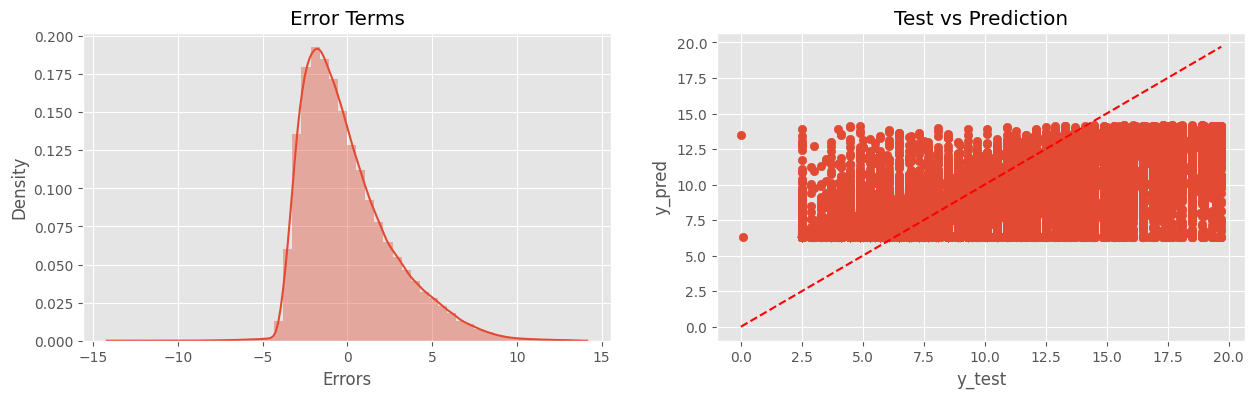

In [41]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

### 5. Polynomial Regression Model


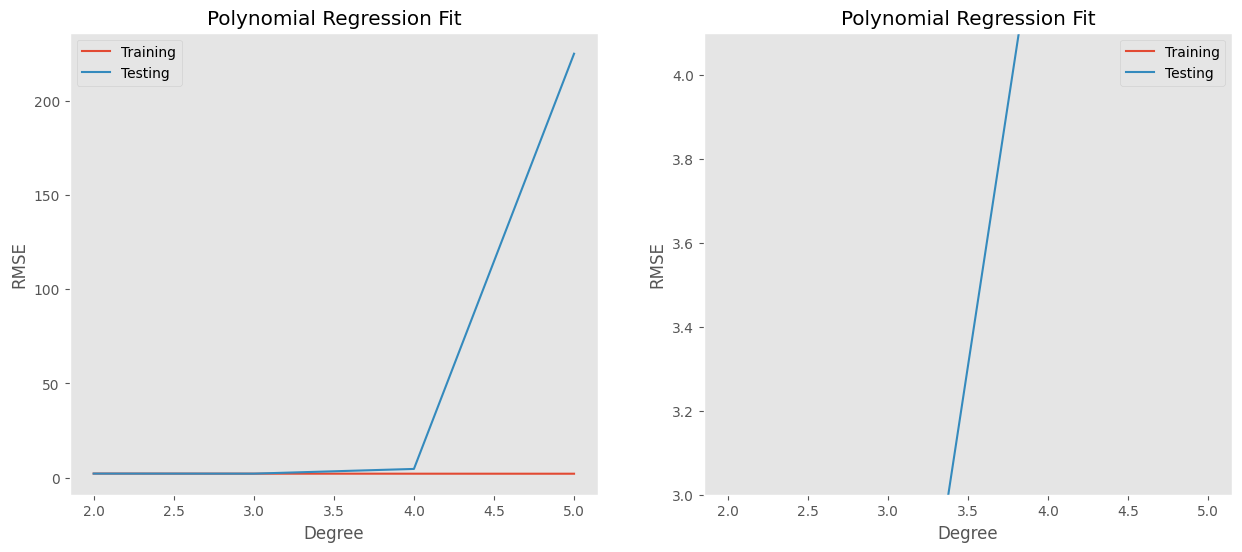

In [42]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=6

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))
    
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([3,4.1])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<------------------------- Evaluating Polynomial Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ -4.18539976  46.82309892   5.4917897  -46.09246683   3.03247489
   0.43140625   0.47967835   0.35372205]
The Intercept of the Regresion Model was found to be  8.608071205452244


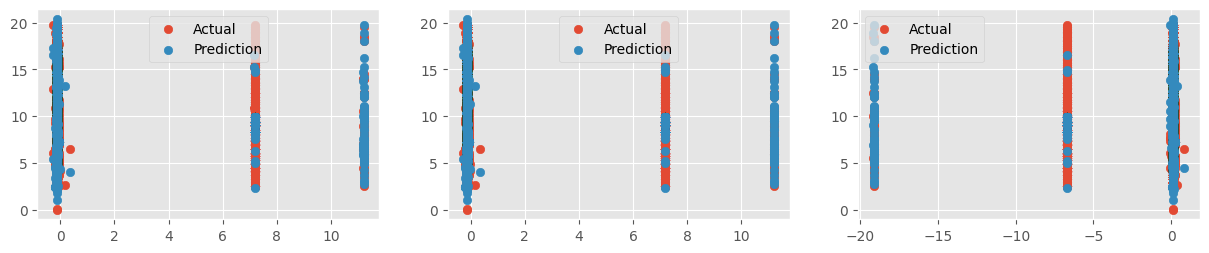



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.696720144337084
Residual Sum of Squares (RSS) on Training set  ---> 586127.7843486106
Mean Squared Error (MSE) on Training set       ---> 4.161066195858374
Root Mean Squared Error (RMSE) on Training set ---> 2.039869161455796

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6914171761603919
Residual Sum of Squares (RSS) on Training set  ---> 149184.61584838823
Mean Squared Error (MSE) on Training set       ---> 4.236394032326799
Root Mean Squared Error (RMSE) on Training set ---> 2.058250235594982

--------------------Residual Plots--------------------


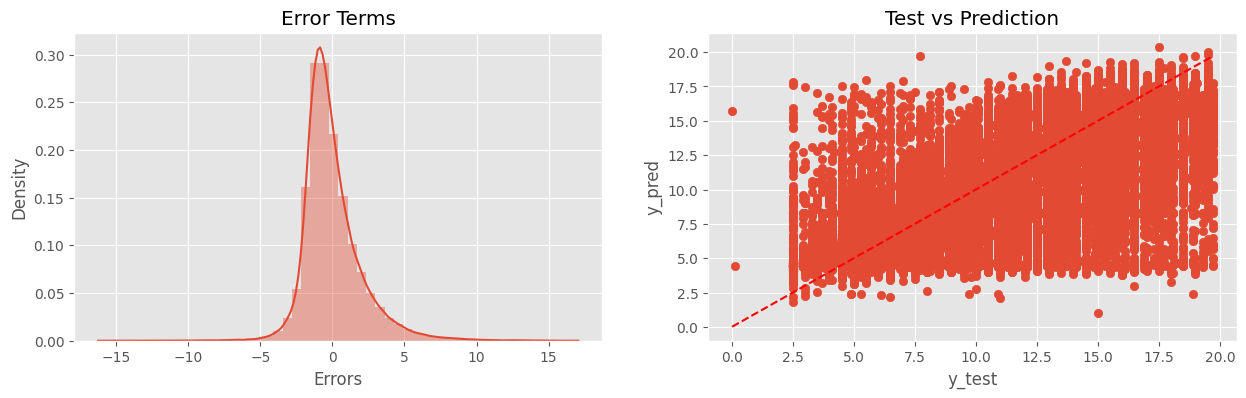

In [43]:
#Using the 5th Order Polynomial Regression model (degree=4)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

### Comparing the Evaluation Metics of the Models

In [44]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.665160,0.667723,647122.320027,160639.738981,4.594081,4.561685,2.143381,2.135810
Ridge Linear Regression (RLR),0.664643,0.667325,648120.988020,160831.819679,4.601171,4.567140,2.145034,2.137087
Lasso Linear Regression (LLR),0.536929,0.536037,894945.121396,224303.227802,6.353437,6.369536,2.520602,2.523794
Elastic-Net Regression (ENR),0.487109,0.485935,991228.579639,248524.920360,7.036977,7.057360,2.652730,2.656569
Polynomial Regression (PNR),0.696720,0.691417,586127.784349,149184.615848,4.161066,4.236394,2.039869,2.058250


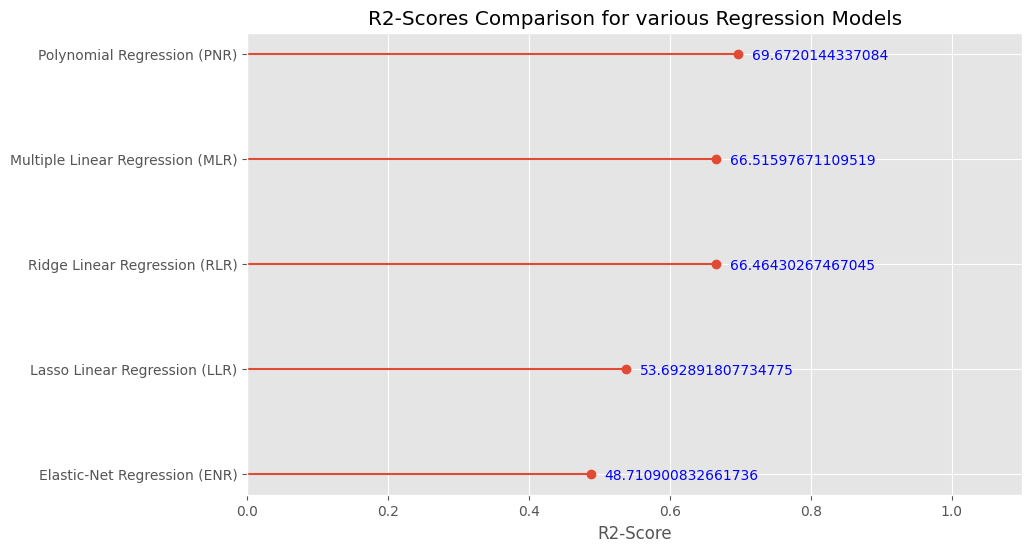

In [45]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Train-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

Inference: From the above plot, it is clear that the polynomial regresion models have the highest explainability power to understand the dataset.

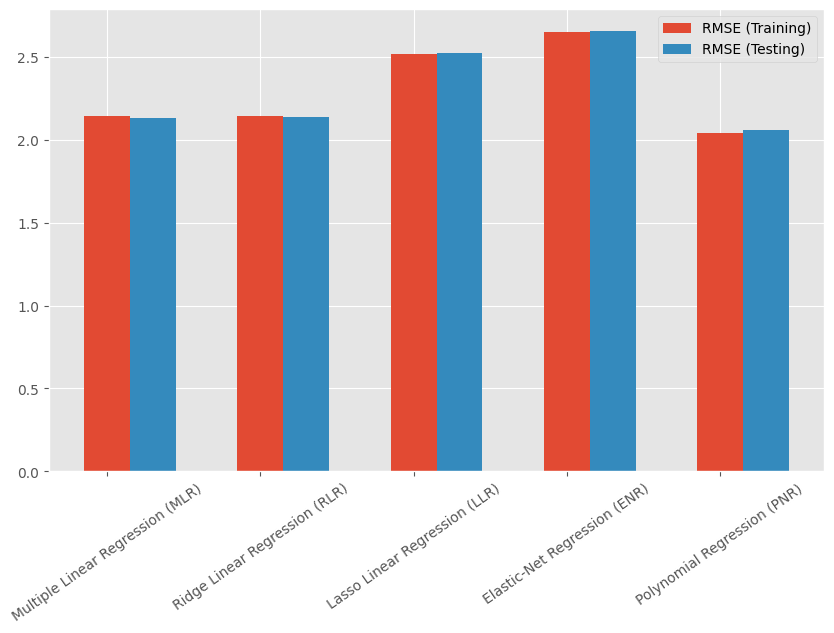

In [46]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
# baxes = brokenaxes(ylims=((0,4),(524,532)))
# baxes.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
# baxes.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
# for index, value in enumerate(Model_Evaluation_Comparison_Matrix[cc[-2]].values):
#     plt.text(round(value,2), index, str(round(value,2)))
# for index, value in enumerate(Model_Evaluation_Comparison_Matrix[cc[-1]].values):
#     plt.text(round(value,2), index, str(round(value,2)))
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation=35)
plt.legend()
#plt.ylim([0,10])
plt.show()

Inference: The complex models like polynomial (degree-3) performs the best on the current dataset. For this problem, it is can be said that even simple regression can be a good choice to go with...

### 7. Project Outcomes & Conclusions
Here are some of the key outcomes of the project: <br>
- The Dataset was large enough totalling 2M samples & after preprocessing 12% of the datasamples were dropped. <br>
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set. <br>
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique. <br>
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset. <br>
- While, Polynomial Regression (Order-3) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable. <br>